# Preprocessing 2nd Dataset

Name                                     Data Type    Measurement                       Description

Elevation                               quantitative    meters                       Elevation in meters
Aspect                                  quantitative    azimuth                      Aspect in degrees azimuth
Slope                                   quantitative    degrees                      Slope in degrees
Horizontal_Distance_To_Hydrology        quantitative    meters                       Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology          quantitative    meters                       Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways         quantitative    meters                       Horz Dist to nearest roadway
Hillshade_9am                           quantitative    0 to 255 index               Hillshade index at 9am, summer solstice
Hillshade_Noon                          quantitative    0 to 255 index               Hillshade index at noon, summer soltice
Hillshade_3pm                           quantitative    0 to 255 index               Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points      quantitative    meters                       Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns)      qualitative     0 (absence) or 1 (presence)  Wilderness area designation
Soil_Type (40 binary columns)           qualitative     0 (absence) or 1 (presence)  Soil Type designation
Cover_Type (7 types)                    integer         1 to 7                       Forest Cover Type designation




In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

CTdata = pd.read_csv('covtype.csv', sep=',')

print(CTdata.columns)

CTdata.shape


Index(['[Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type4

(581012, 55)

In [122]:
CTdata.describe(include='all')

,[Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [129]:
X = CTdata.drop(columns=['Cover_Type'])
y = CTdata['Cover_Type'].values

print("X", X.shape)
print("y", y.shape)
print(X)

X (581012, 54)
y (581012,)
        [Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0             2596      51      3                               258   
1             2590      56      2                               212   
2             2804     139      9                               268   
3             2785     155     18                               242   
4             2595      45      2                               153   
5             2579     132      6                               300   
6             2606      45      7                               270   
7             2605      49      4                               234   
8             2617      45      9                               240   
9             2612      59     10                               247   
10            2612     201      4                               180   
11            2886     151     11                               371   
12            2742     134     22                 

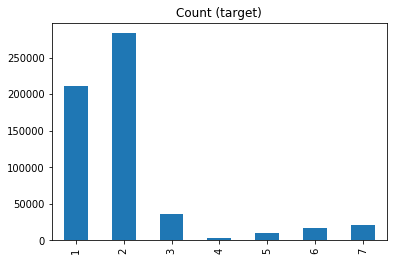

In [130]:
y_series = pd.Series(y)
target_count = y_series.value_counts().sort_index()
target_count.plot(kind='bar', title='Count (target)');

In [131]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

sampler = RandomUnderSampler(random_state=12)
X_res, y_res = sampler.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 2747, 2: 2747, 3: 2747, 4: 2747, 5: 2747, 6: 2747, 7: 2747})


[[3129  359   18 ...    0    0    0]
 [2999  352   13 ...    0    0    0]
 [3026   72    6 ...    0    0    0]
 ...
 [3383  182   23 ...    0    1    0]
 [3143   32    6 ...    0    0    0]
 [3390  201    8 ...    1    0    0]]


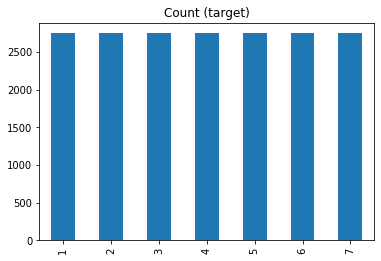

In [132]:
print(X_res)
y_res_series = pd.Series(y_res)
target_count_res = y_res_series.value_counts().sort_index()
target_count_res.plot(kind='bar', title='Count (target)');


In [133]:
data = pd.DataFrame(X_res, columns=CTdata.columns[:-1])
print(data.shape)
print(data)
data.describe(include='all')
df2 = pd.DataFrame(y_res, columns=['Cover_Type'])
data = pd.concat([data, df2], axis=1)
data.to_csv(r'convAfterUndersampling.csv', index = False)

(19229, 54)
       [Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            3129     359     18                               541   
1            2999     352     13                               247   
2            3026      72      6                                60   
3            3146      82     11                               376   
4            3280      35     10                                67   
5            3180      53     20                               600   
6            3075       3      5                                30   
7            3015     182      6                               285   
8            2903     116     13                                42   
9            2890     326     27                               170   
10           3175      48      6                               446   
11           3381     142      3                               895   
12           3375     123     10                               446   
13      

In [134]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

result = pd.read_csv('convAfterUndersampling.csv', sep=',')


y = result.pop('Cover_Type').values
X = result.values
#y = test[:,0]


#2. Feature selection using decision tree ensembles
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print("Feature ranking =",clf.feature_importances_)
print("Original data shape:",X.shape,"\nNew data shape:",X_new.shape)
df2 = pd.DataFrame(y, columns=['Cover_Type'])

column_names = result.columns[model.get_support()]
df1 = pd.DataFrame(X_new, columns=column_names)
print(df1)

resultETC = pd.concat([df1, df2], axis=1)
#resultETC = pd.concat([X_new, y], axis=1, ignore_index=True)
print(resultETC)
resultETC.to_csv(r'convETC.csv', index = False)

Feature ranking = [1.63422824e-01 4.84954939e-02 4.02620197e-02 5.84637457e-02
 4.96871792e-02 8.10688393e-02 5.09658970e-02 4.45829442e-02
 4.34246654e-02 6.81397613e-02 2.33223559e-02 6.03550329e-03
 2.37471651e-02 4.94751301e-02 2.46446197e-03 1.06675836e-02
 2.17925283e-02 1.84373841e-02 2.29830201e-03 4.45048185e-03
 0.00000000e+00 0.00000000e+00 1.56732558e-04 2.65461310e-02
 4.47710977e-03 5.99493715e-03 7.82498383e-03 2.51633086e-03
 0.00000000e+00 1.52911364e-03 1.10711081e-02 8.22608057e-04
 9.19643461e-04 2.01048938e-03 4.93234185e-04 7.65381849e-03
 6.95299228e-03 3.43494692e-03 7.24446703e-05 6.62703888e-04
 1.05079384e-04 3.32755907e-04 6.80429868e-03 1.23901622e-02
 3.81345485e-03 5.05875671e-03 5.19105878e-03 4.59311585e-04
 4.53488421e-03 1.44324083e-04 1.04823854e-03 2.69762928e-02
 2.49033898e-02 1.38943988e-02]
Original data shape: (19229, 54) 
New data shape: (19229, 17)
       [Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            3129     359

In [137]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler


result = pd.read_csv('convAfterUndersampling.csv', sep=',')


y = result.pop('Cover_Type').values
X = result.values
#y = test[:,0]



print("Initial shape: "+str(X.shape))
X_norm = MinMaxScaler().fit_transform(X)

X_norm = pd.DataFrame(X_norm, columns=result.columns)
#print(X_norm)
kbest = SelectKBest(chi2, k=20)
X_new = kbest.fit_transform(X_norm, y)
print("Shape after reduction : "+str(X_new.shape));

column_names = result.columns[kbest.get_support()]
X_new = pd.DataFrame(X_norm, columns=column_names)
print(X_new.shape)

df2 = pd.DataFrame(y, columns=['Cover_Type'])
resultKBest = pd.concat([X_new, df2], axis=1)

#resultKBest = np.concatenate((X_new, y), axis=0)
# = pd.concat([, y], axis=1, ignore_index=True)
print(resultKBest)
resultKBest.to_csv(r'convKBest.csv', index = False)


Initial shape: (19229, 54)
Shape after reduction : (19229, 20)
(19229, 20)
       [Elevation  Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  \
0        0.631446               0.0               0.0               1.0   
1        0.565723               0.0               0.0               1.0   
2        0.579373               1.0               0.0               0.0   
3        0.640040               1.0               0.0               0.0   
4        0.707786               1.0               0.0               0.0   
5        0.657230               0.0               0.0               1.0   
6        0.604146               1.0               0.0               0.0   
7        0.573812               1.0               0.0               0.0   
8        0.517189               1.0               0.0               0.0   
9        0.510617               1.0               0.0               0.0   
10       0.654702               1.0               0.0               0.0   
11       0.758847        